### Ý tưởng: 
- Chia mảng pixel thành các block 8x8 
- Biển diễn mảng 8x8 pixel thành 1 pixel duy nhất (Lấy giá trị trung bình)
- Ngoài giá trị trung bình thì giữ lại thêm một vài giá trị quan trọng khác nữa
    - Lưu sự thay đổi màu dựa trên các ảnh cơ bản
    - Discrete Cosine Transfom (Discrete: Rời rạc)

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
pixels = np.array(Image.open('lena.bmp'))
pixels.shape

(512, 512)

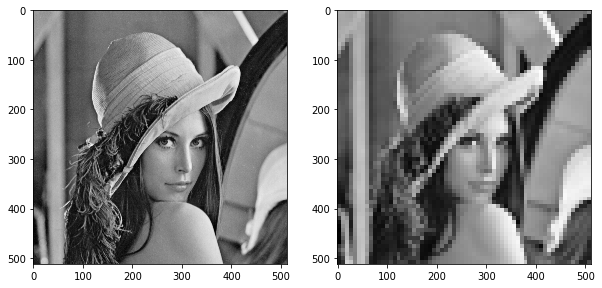

In [3]:
block_width = 8   # Kích thước block chia mảng pixel
zipped_pixels = np.empty_like(pixels) # Lưu mảng sau khi nén
for start_r in range(0, pixels.shape[0], block_width):  # Duyệt từng dòng - start_r là chỉ số dòng
    for start_c in range(0, pixels.shape[1], block_width):    # Duyệt từng cột - start_c là chỉ số cột
        # print(start_r, start_c)                             # Danh sách chỉ số của pixel bắt đầu block
        end_r = min(start_r + block_width, pixels.shape[0])   # Đảm bảo end_r không vượt qua quá số dòng của pixels
        end_c = min(start_c + block_width, pixels.shape[1])   # Đảm bảo end_r không vượt qua quá số cột của pixels
        pixels8x8 = pixels[start_r:end_r, start_c:end_c]      # Lấy block 8x8
        block_mean = np.mean(pixels8x8)                       # Tính giá trị trung bình của mảng
        zipped_pixels[start_r:end_r, start_c:end_c] = block_mean # Gán tất cả các phần tử trong block bằng giá trị trung bình

plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.imshow(pixels, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(zipped_pixels, cmap='gray')